In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import shutil

import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import LightningDataset
from torch_geometric.utils import to_networkx

from routing.datasets import DijkstraDataset

In [3]:
dataset = DijkstraDataset("../data", n_samples=10_000, n_nodes=100, edge_factor=2)
dm = LightningDataset(dataset, batch_size=100)
data = list(dm.train_dataloader())

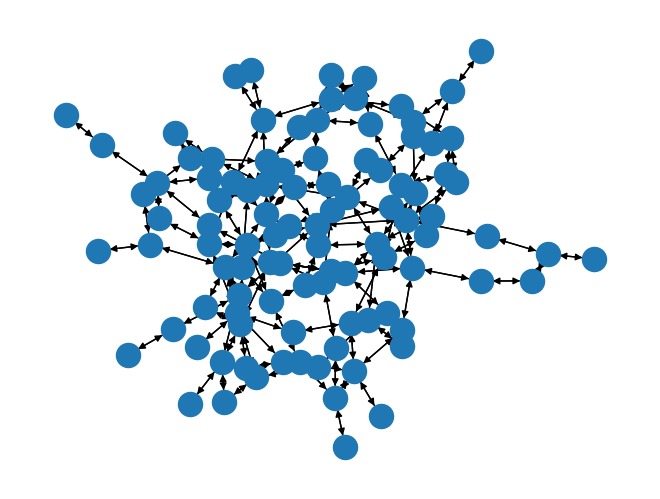

In [4]:
plt.figure()
G = to_networkx(dataset[0])
nx.draw(G, pos=nx.spring_layout(G))

In [5]:
import guild.ipy as guild
import pandas as pd

runs = guild.runs()
# best_id = runs.scalars().query("tag == 'val/loss'").sort_values("min_val").iloc[0].run
# run = runs[runs.run == best_id].iloc[0]
# display(run.info())
# display(run.scalars())
run_dir = runs.iloc[0].run.value.dir

In [137]:
from routing.models import MLPGNN
import torch

gnn = from routing.models import MLPGNN
.load_from_checkpoint(run_dir + "/checkpoints/last.ckpt")

/tmp/ipykernel_289878/1330705043.py:10: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


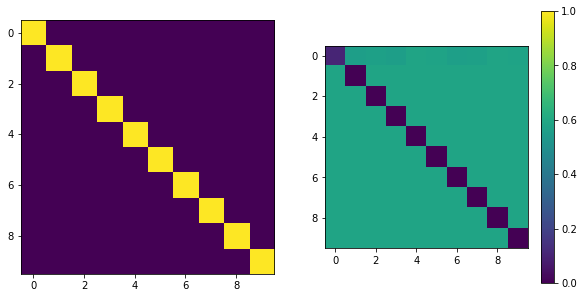

In [149]:
import matplotlib.pyplot as plt

data = dataset[0]
x = data.x.detach().numpy()
y = gnn(data).detach().numpy()

fix, ax = plt.subplots(1, 2, figsize=(10, 5))
im = ax[0].imshow(x, vmin=0, vmax=1)
ax[1].imshow(y, vmin=0, vmax=1)
plt.colorbar(im)